In [43]:
#Importing Packages and reading the file
import pandas as pd
import seaborn as sns
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('content/bank-full.csv',sep=";")

In [44]:
#Trying to see if data was loaded properly
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [45]:
#Checking the rows and columns in the dataframe
print(data.shape)

(45211, 17)


In [46]:
#Checking datatypes of each column
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


# Below code tells us that there are no missing values and that the data is fit to proceed with as it is for now.

In [47]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [48]:
print(data.duplicated().sum())

0


# Overall data spread check

age            AxesSubplot(0.125,0.536818;0.168478x0.343182)
balance     AxesSubplot(0.327174,0.536818;0.168478x0.343182)
day         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
duration    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
campaign          AxesSubplot(0.125,0.125;0.168478x0.343182)
pdays          AxesSubplot(0.327174,0.125;0.168478x0.343182)
previous       AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

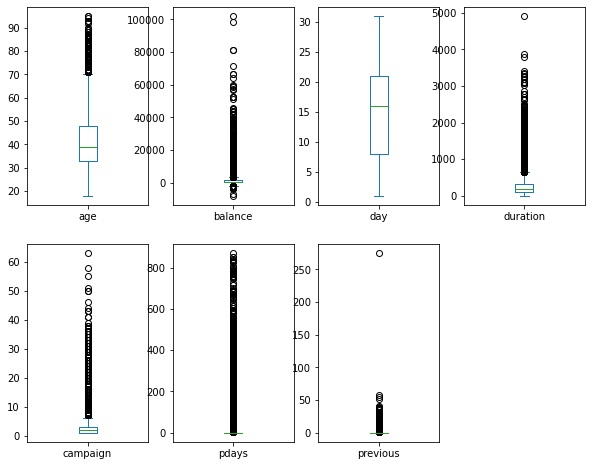

In [49]:
data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].plot(kind='box', subplots=True, layout=(2,4), figsize=(10,8))

In [50]:
#Getting a better idea of how spread is the data
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# Count of Desposits Made

AxesSubplot(0.125,0.125;0.775x0.755)


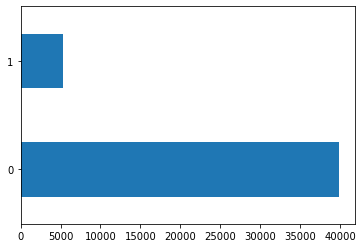

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yes' and 'no' to 1 and 0
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

# Plot countplot of 'y' column
print(data['y'].value_counts().plot(kind='barh'))

# Check Correlation b/w variables

<AxesSubplot:>

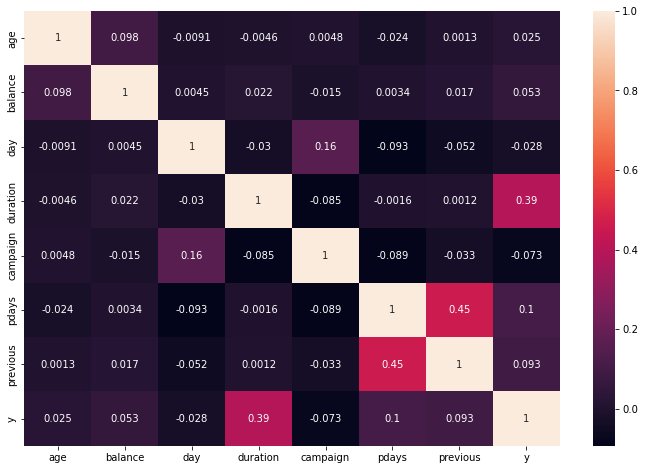

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

# Age spread check - A large chunk of population is middle aged

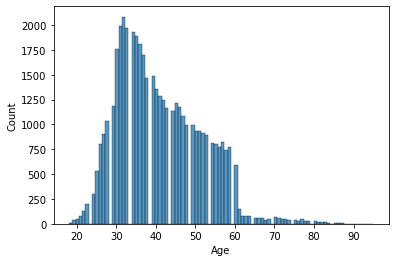

In [53]:
sns.histplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Cellular was the most successful form of communication

            Yes     No       pct
cellular   4369  24916  0.175349
unknown     530  12490  0.042434
telephone   390   2516  0.155008


<AxesSubplot:title={'center':'Contact vs Deposit Made'}>

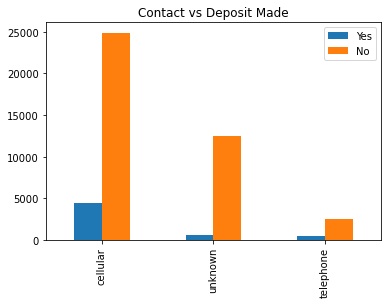

In [54]:
contact_df = pd.DataFrame()

contact_df['Yes'] = data[data['y'] == 1]['contact'].value_counts()
contact_df['No'] = data[data['y'] == 0]['contact'].value_counts()
contact_df['pct'] = data[data['y'] == 1]['contact'].value_counts()/data[data['y'] == 0]['contact'].value_counts()
print(contact_df)

contact_df.drop('pct',inplace=True,axis=1)
contact_df.plot.bar(title = 'Contact vs Deposit Made')

# Married Customers Less likely to make a deposit

           yes     no       pct
married   2755  24459  0.112637
single    1912  10878  0.175768
divorced   622   4585  0.135660


<AxesSubplot:title={'center':'Marital status vs Deposit Made'}>

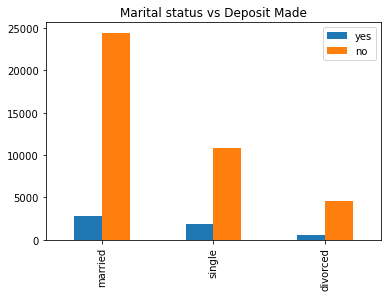

In [55]:
marital_df = pd.DataFrame()

marital_df['yes'] = data[data['y'] == 1]['marital'].value_counts()
marital_df['no'] = data[data['y'] == 0]['marital'].value_counts()
marital_df['pct'] = data[data['y'] == 1]['marital'].value_counts()/data[data['y'] == 0]['marital'].value_counts()
print(marital_df)

marital_df.drop('pct',inplace=True,axis=1)
marital_df.plot.bar(title = 'Marital status vs Deposit Made')

# Deposit is least among blue collar workers and highest among students followed by retired persons

                yes    no       pct
management     1301  8157  0.159495
technician      840  6757  0.124316
blue-collar     708  9024  0.078457
admin.          631  4540  0.138987
retired         516  1748  0.295195
services        369  3785  0.097490
student         269   669  0.402093
unemployed      202  1101  0.183470
self-employed   187  1392  0.134339
entrepreneur    123  1364  0.090176
housemaid       109  1131  0.096375
unknown          34   254  0.133858


<AxesSubplot:title={'center':'Job vs Deposit Made'}>

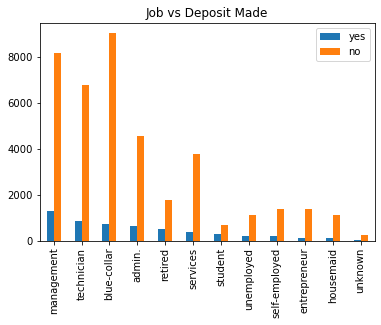

In [56]:
job_df = pd.DataFrame()

job_df['yes'] = data[data['y'] == 1]['job'].value_counts()
job_df['no'] = data[data['y'] == 0]['job'].value_counts()
job_df['pct'] = data[data['y'] == 1]['job'].value_counts()/data[data['y'] == 0]['job'].value_counts()
print(job_df)

job_df.drop('pct',inplace=True,axis=1)

job_df.plot.bar(title = 'Job vs Deposit Made')

# People who subscribed have greater age values.

               yes            no
count  5289.000000  39922.000000
mean     41.670070     40.838986
std      13.497781     10.172662
min      18.000000     18.000000
25%      31.000000     33.000000
50%      38.000000     39.000000
75%      50.000000     48.000000
max      95.000000     95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

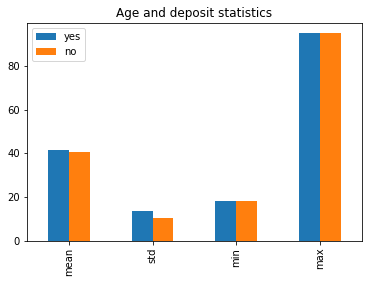

In [57]:
agewise_df = pd.DataFrame()
agewise_df['yes'] = (data[data['y'] == 1][['y','age']].describe())['age']
agewise_df['no'] = (data[data['y'] == 0][['y','age']].describe())['age']

print(agewise_df)

agewise_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

# Fewer contacts yielded more results

       campaign_yes   campaign_no
count   5289.000000  39922.000000
mean       2.141047      2.846350
std        1.921826      3.212767
min        1.000000      1.000000
25%        1.000000      1.000000
50%        2.000000      2.000000
75%        3.000000      3.000000
max       32.000000     63.000000


<AxesSubplot:title={'center':'Campaign Contacts vs. Deposit statistics'}>

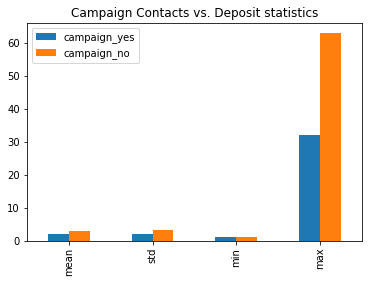

In [58]:
campaign_frame = pd.DataFrame()
campaign_frame['campaign_yes'] = (data[data['y'] == 1][['y','campaign']].describe())['campaign']
campaign_frame['campaign_no'] = (data[data['y'] == 0][['y','campaign']].describe())['campaign']

print(campaign_frame)

campaign_frame.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign Contacts vs. Deposit statistics')

# People with tertiary income made the most amount of deposits and people with only primary education made the least

            yes     no       pct
secondary  2450  20752  0.118061
tertiary   1996  11305  0.176559
primary     591   6260  0.094409
unknown     252   1605  0.157009


<AxesSubplot:title={'center':'Education vs Deposit Made'}>

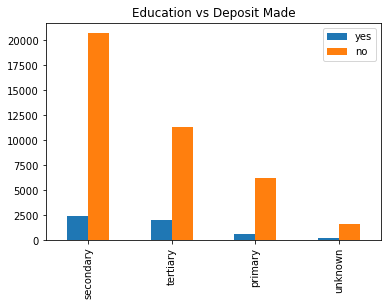

In [59]:
edu_frame = pd.DataFrame()
edu_frame['yes'] = data[data['y'] == 1]['education'].value_counts()
edu_frame['no'] = data[data['y'] == 0]['education'].value_counts()
edu_frame['pct'] = data[data['y'] == 1]['education'].value_counts()/data[data['y'] == 0]['education'].value_counts()
print(edu_frame)

edu_frame.drop('pct',inplace=True,axis=1)
edu_frame.plot.bar(title = 'Education vs Deposit Made')

From the above correlation and feature weightage tests it is rather clear that certain variables play a huge role on how the campaigns performed. To dig deeper into this a machine learning model might be helpful and yield better results. Since the data is not missing any values we will not need to fill in any columns. 

# Training a Random Forest Classifier to check Feature Importance

In [60]:
# Convert categorical variables into dummy variables
data_rfc = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Split the data into input features (X) and target variable (y)
X = data_rfc.drop('y', axis=1)
y = data_rfc['y']

# Train a random forest classifier on the data
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X, y)

# Get feature importances from the trained random forest classifier
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. duration (0.266478)
2. balance (0.094428)
3. age (0.091575)
4. day (0.081141)
5. poutcome_success (0.048991)
6. campaign (0.038236)
7. pdays (0.037753)
8. previous (0.020196)
9. month_mar (0.012970)
10. housing_no (0.012858)
11. month_apr (0.012622)
12. housing_yes (0.012562)
13. education_secondary (0.011627)
14. education_tertiary (0.010882)
15. month_jun (0.010881)
16. marital_married (0.010526)
17. job_technician (0.010509)
18. month_oct (0.010452)
19. job_management (0.010181)
20. marital_single (0.009221)
21. month_may (0.009188)
22. contact_cellular (0.009159)
23. month_aug (0.008937)
24. job_admin. (0.008868)
25. contact_unknown (0.008551)
26. poutcome_unknown (0.008461)
27. job_blue-collar (0.008448)
28. poutcome_failure (0.008392)
29. month_jul (0.008198)
30. month_sep (0.007896)
31. month_feb (0.007834)
32. month_nov (0.007585)
33. marital_divorced (0.007117)
34. education_primary (0.006919)
35. job_services (0.006420)
36. loan_yes (0.006292)
37. loan_no 

Based on Random Forest Classifier the duration of the call,balance in the account and the age of the person plays a big role in determining the fact that whether they will make a deposit or not.

# XG Boost

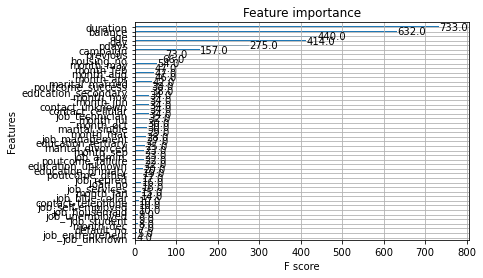

In [61]:
# Performing one-hot encoding on the categorical columns
data_xgb = pd.get_dummies(data, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_xgb.drop("y", axis=1), data_xgb["y"], test_size=0.2, random_state=42)

# Instantiate an XGBoost model
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Plot the feature importances
xgb.plot_importance(model)
plt.ylim(-0.5, None)  # Setting the lower limit to -0.5 to change spacing
plt.show()

Just like the Random Forest, XGBoost also tells us that duration of the call, age of the person and the balance have the most relation to how likely it is for a person to open a deposit.

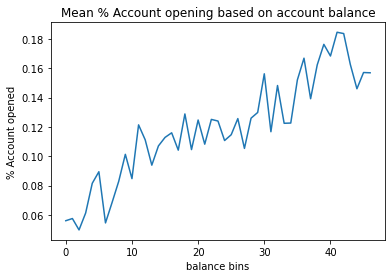

In [62]:
df_check = data.copy()

#buckets for better segmentation
df_check['balance_bins'] = pd.qcut(df_check['balance'], 50, labels=False, duplicates = 'drop')

#find average campaign outcome per bucket
mean_deposit = df_check.groupby(['balance_bins'])['y'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % Account opening based on account balance')
plt.xlabel('balance bins')
plt.ylabel('% Account opened')
plt.show()

In [63]:
df_check[df_check['balance_bins'] == 35]['balance'].min()

1509

From the above it is clear that focus should be on account balance greater than 1509

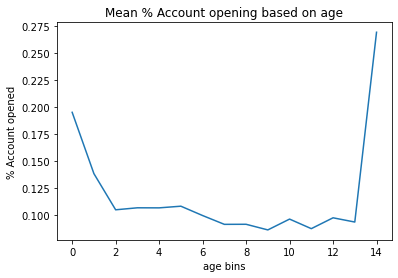

In [64]:
#creating buckets to segment
df_check['age_bin'] = pd.qcut(df_check['age'], 15, labels=False, duplicates = 'drop')

#find average campaign outcome per bucket
mean_deposit = df_check.groupby(['age_bin'])['y'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % Account opening based on age')
plt.xlabel('age bins')
plt.ylabel('% Account opened')
plt.show()

In [65]:
df_check[df_check['age_bin'] == 2]['age'].max()

32

In [66]:
df_check[df_check['age_bin'] == 13]['age'].max() #14 gives 95 since that is an outlier

58

Based on this it would be accurate to say that the term deposit is primarily opened by people between ages of 32 and 58

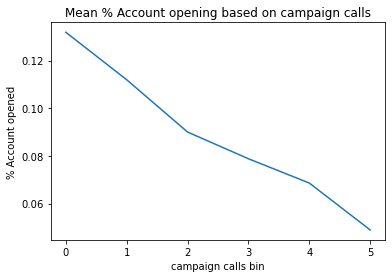

In [67]:
#creating buckets to segment
df_check['campaign_bin'] = pd.qcut(df_check['campaign'], 15, labels=False, duplicates = 'drop')

#find average campaign outcome per bucket
mean_deposit = df_check.groupby(['campaign_bin'])['y'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % Account opening based on campaign calls')
plt.xlabel('campaign calls bin')
plt.ylabel('% Account opened')
plt.show()

In [68]:
df_check[df_check['campaign_bin'] == 2]['campaign'].min()

4

After this it is evident that if campaign calls are over 4 then the account opening reduces. So less than 4 calls should be made.

# Insights/Inference

Age: Customers of greater age are more likely to subscribe for the term deposit. The data shows that the older the customer, the higher the probability of subscribing for the term deposit. This could be because older customers are more financially stable, have higher savings, or are more risk-averse and prefer safe investments like term deposits. Ages between 32-58 can be an ideal target group also since the numbers denote a decent account opening rate here.

Account balance: Customers with greater account balance are more likely to subscribe for the term deposit. The data shows that customers with higher account balances are more likely to subscribe for the term deposit. This could be because customers with higher account balances have more disposable income and can afford to invest in term deposits, or because they are more financially savvy and understand the benefits of term deposits. Balance greater than 1509 should be targeted for a higher conversion rate.

Number of contacts: The number of contacts with the customers really matters. Too many contacts with the customer could make them decline the offer. The data shows that customers who were contacted fewer times were more likely to subscribe for the term deposit, while those who were contacted too many times were less likely to subscribe. This suggests that there is a sweet spot for the number of contacts, and that too many contacts may be perceived as pushy or annoying, while too few may not be enough to persuade the customer to subscribe. Less than 4 contacts yields better results.

Education: Customers with higher education levels are more likely to subscribe for the term deposit. The data shows that customers with tertiary education are more likely to subscribe for the term deposit, while those with lower education levels are less likely to subscribe. This could be because customers with higher education levels are more financially literate and understand the benefits of term deposits, or because they have higher-paying jobs and more disposable income.

Job: Customers with certain job types are more likely to subscribe for the term deposit. The data shows that customers who are retired or students are more likely to subscribe for the term deposit, while those who are blue-collar or self-employed are less likely to subscribe. This could be because retired customers have more time and are looking for safe investments, while students may have some savings and are looking for safe places to invest them.

These insights can help the bank improve its marketing strategy and target the right customers with the right offers, leading to higher subscription rates and better returns.